# Task 1 — Empirical evaluation of the bloom filter
##### ref: https://pypi.org/project/bloom-filter2/
##### ref: https://github.com/remram44/python-bloom-filter


In [1]:

fpr = [1/(2**7), 1/(2**8), 1/(2**10)]

fpr

[0.0078125, 0.00390625, 0.0009765625]

In [2]:
# ## small experiment to get familiar with the functions

from bloom_filter2 import BloomFilter
import numpy as np
import random


# bloom = BloomFilter(max_elements=10_000, error_rate=fpr[0])
# print(bloom)

# assert "test-key" not in bloom

# # Mark the key as seen
# bloom.add("test-key")

# # Now check again
# assert "test-key" in bloom

In [3]:
# from random_word import RandomWords
# r = RandomWords()
## random word generator: https://pypi.org/project/Random-Word/


# random_unique_words = set()
# for i in range(5000):
#     w = r.get_random_word()
    
#     while True:
#         if w not in random_unique_words:
#             random_unique_words.add(w)
#             break
    
# # len(random_unique_words) == 2000
# # len(random_unique_words)

# with open('random_words_2.txt', 'w') as f:
#     f.write('\n'.join(random_unique_words))

In [4]:
## ref: mit.edu mit_wordlist_10000
with open('mit_wordlist_10000.txt', 'r') as f:
    random_unique_words = f.readlines()

### since BBHashTable only accepts integers and we are allowed to use integers, I am taking 10,000 integers for our experiments instead.
## ref: https://piazza.com/class/ld0gqwk4xme2vy/post/87

## To use string keys instead, please set "use_string=True" below.
## However, using string keys instead of integers give similar results (i.e., similar patterns in the graphs).

use_string=False

if use_string:
    random_unique_words = [x.strip() for x in random_unique_words]
else:
    random_unique_words = [ random.randint(100, 2**32) for i in range(10_000) ] 

len(random_unique_words)

10000

In [5]:
from time import time
import os
import pickle

In [6]:
"""
For each input dataset, and for each target false positive rate, measure:
(a) what is the observed false positive rate (also, as a sanity check, ensure you have no false negatives) 
(b) what is the total time spent querying K’ and 
(c) what is the total size of the bloom filter? 
"""

## dataset1

# size_of_K = 2_000

K_sizes_ = [1_000, 2_000, 3_000, 4_000, 5_000]

results = -1 * np.ones([10, 6, 5, 3])

for run_num in range(10):
    for index_k, size_of_K in enumerate(K_sizes_):
        import random
        random.shuffle(random_unique_words)
        print('\n\n')
        print(''.join(["="] * 50))
        print("size_of_K :\t", size_of_K)
#         print("size_of_K':\t", size_of_K*2)

        K = random_unique_words[:size_of_K] # input keys
        Kprime_extra = random_unique_words[size_of_K:size_of_K*2] # samples that are in Kprime but not in K

        for index_fpr, current_fpr in enumerate(fpr):
            ## setting fpr
            print('\n>>target_fpr:', current_fpr)
            bloom = BloomFilter(max_elements=len(K), error_rate=current_fpr)
            print(bloom)

            ## input K
            for w in K:
                bloom.add(w)

            ## sanity check, ensuring I have no false negatives
            fn_count = 0
            for w in K:
                if w not in bloom:
                    fn_count += 1
            if fn_count > 0:
                print("fn_count:", fn_count)
                raise Exception

            ## observed false positive rate
            total_time = 0
            fp_count = 0
            for w in Kprime_extra:
                t0 = time()
                if w in bloom:
                    fp_count += 1
                total_time += (time() - t0)

            print("fp_count:", fp_count)
        #     print("Observed FPR:", fp_count / (len(Kprime_extra)+len(K)))
            print("observed_fpr:", fp_count / (size_of_K))
            print("total_time", total_time)
            backend_array = np.array(bloom.backend.array_)
    #         print((backend_array != 0).sum(), (backend_array == 0).sum(), backend_array.shape)
            a = 0
            for i in range(bloom.backend.num_bits):
                if bloom.backend.is_set(i):
                    a += 1
            print('Number of set bits:', a, '\tTotal bits:', bloom.num_bits_m, '\tTotal words:', bloom.backend.num_words, 'bytes')

            with open(f'bloom.pkl', 'wb') as f:
                pickle.dump(bloom, f, pickle.HIGHEST_PROTOCOL)
            print(f'{index_k}_{index_fpr}, size on disk:', os.path.getsize(f'bloom.pkl')/1000)

            results[run_num, 0, index_k, index_fpr] = current_fpr
            results[run_num, 1, index_k, index_fpr] = fp_count / (size_of_K)
            results[run_num, 2, index_k, index_fpr] = total_time
            results[run_num, 3, index_k, index_fpr] = bloom.backend.num_words
            results[run_num, 4, index_k, index_fpr] = a
            results[run_num, 5, index_k, index_fpr] = os.path.getsize(f'bloom.pkl')/1000





size_of_K :	 1000

>>target_fpr: 0.0078125
BloomFilter(ideal_num_elements_n=1000, error_rate_p=0.007812, num_bits_m=10099)
fp_count: 12
observed_fpr: 0.012
total_time 0.0062885284423828125
Number of set bits: 5508 	Total bits: 10099 	Total words: 316 bytes
0_0, size on disk: 2.86

>>target_fpr: 0.00390625
BloomFilter(ideal_num_elements_n=1000, error_rate_p=0.003906, num_bits_m=11542)
fp_count: 4
observed_fpr: 0.004
total_time 0.006038665771484375
Number of set bits: 6281 	Total bits: 11542 	Total words: 361 bytes
0_1, size on disk: 3.22

>>target_fpr: 0.0009765625
BloomFilter(ideal_num_elements_n=1000, error_rate_p=0.000977, num_bits_m=14427)
fp_count: 1
observed_fpr: 0.001
total_time 0.00580906867980957
Number of set bits: 7718 	Total bits: 14427 	Total words: 451 bytes
0_2, size on disk: 3.94



size_of_K :	 2000

>>target_fpr: 0.0078125
BloomFilter(ideal_num_elements_n=2000, error_rate_p=0.007812, num_bits_m=20198)
fp_count: 18
observed_fpr: 0.009
total_time 0.011002540588378906


In [7]:
mean_results = results.mean(0)

In [8]:
# results.std(0)
mean_results[1:].shape, mean_results[0]

((5, 5, 3),
 array([[0.0078125 , 0.00390625, 0.00097656],
        [0.0078125 , 0.00390625, 0.00097656],
        [0.0078125 , 0.00390625, 0.00097656],
        [0.0078125 , 0.00390625, 0.00097656],
        [0.0078125 , 0.00390625, 0.00097656]]))

results_task1 folder already exists.


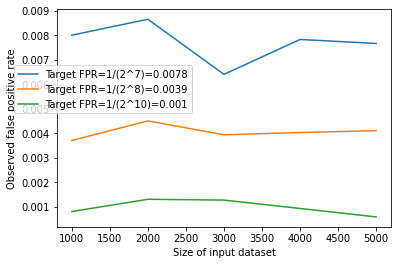

In [9]:
from matplotlib import pyplot as plt

## what is the observed false positive rate (also, as a sanity check, ensure you have no false negatives)
## (i.e. what fraction of keys not in K return an index less than the number of elements of K when queried), 

plt.plot(K_sizes_, mean_results[1, :, 0], label='Target FPR=1/(2^7)=0.0078')
plt.plot(K_sizes_, mean_results[1, :, 1], label='Target FPR=1/(2^8)=0.0039')
plt.plot(K_sizes_, mean_results[1, :, 2], label='Target FPR=1/(2^10)=0.001')

plt.xlabel('Size of input dataset')
plt.ylabel('Observed false positive rate')

plt.legend(loc='best', bbox_to_anchor=(.95, .4))

try:
    os.mkdir('results_task1')
except:
    print('results_task1 folder already exists.')
    
plt.savefig('results_task1/observed_false_positive_rate')

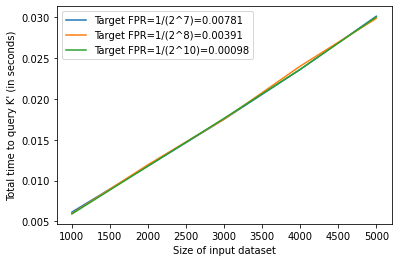

In [10]:
# what is the total time spent querying K’

plt.plot(K_sizes_, mean_results[2, :, 0], label='Target FPR=1/(2^7)=0.00781')
plt.plot(K_sizes_, mean_results[2, :, 1], label='Target FPR=1/(2^8)=0.00391')
plt.plot(K_sizes_, mean_results[2, :, 2], label='Target FPR=1/(2^10)=0.00098')

plt.xlabel('Size of input dataset')
plt.ylabel('Total time to query K\' (in seconds)')

plt.legend()
plt.savefig('results_task1/time_to_query_Kprime')

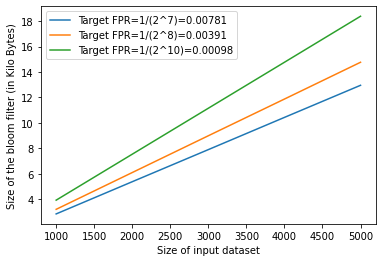

In [11]:
# what is the total size of the bloom filter

plt.plot(K_sizes_, mean_results[5, :, 0], label='Target FPR=1/(2^7)=0.00781')
plt.plot(K_sizes_, mean_results[5, :, 1], label='Target FPR=1/(2^8)=0.00391')
plt.plot(K_sizes_, mean_results[5, :, 2], label='Target FPR=1/(2^10)=0.00098')

plt.xlabel('Size of input dataset')
plt.ylabel('Size of the bloom filter (in Kilo Bytes)')

plt.legend()
plt.savefig('results_task1/size_of_bloom_filter')

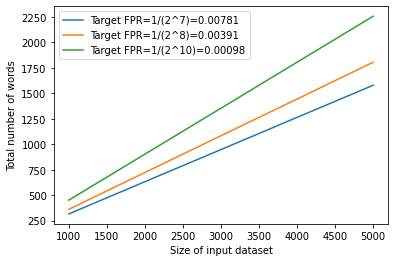

In [12]:
# [Extra] total number of words

plt.plot(K_sizes_, mean_results[3, :, 0], label='Target FPR=1/(2^7)=0.00781')
plt.plot(K_sizes_, mean_results[3, :, 1], label='Target FPR=1/(2^8)=0.00391')
plt.plot(K_sizes_, mean_results[3, :, 2], label='Target FPR=1/(2^10)=0.00098')

plt.xlabel('Size of input dataset')
plt.ylabel('Total number of words')

plt.legend()
plt.savefig('results_task1/extra_result____total_number_of_words')

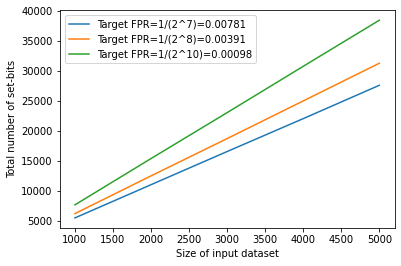

In [13]:
# [Extra] total number of set-bits

plt.plot(K_sizes_, mean_results[4, :, 0], label='Target FPR=1/(2^7)=0.00781')
plt.plot(K_sizes_, mean_results[4, :, 1], label='Target FPR=1/(2^8)=0.00391')
plt.plot(K_sizes_, mean_results[4, :, 2], label='Target FPR=1/(2^10)=0.00098')

plt.xlabel('Size of input dataset')
plt.ylabel('Total number of set-bits')

plt.legend()
plt.savefig('results_task1/extra_result____total_number_of_setbits')

In [14]:
## took an average over 10 different runs.

## Comment on how your observations match with the theory in terms of bloom filter false positive rate, and size. 
## -> The observed FPR almost agrees with the theoretical FPR. Although at some points, it is slightly lower than the theoretical FPR, there is no certain trend. It seems like with larger dataset the observed FPR gets event closer to the theoretical FPR.


## Also comment on how the false positive rate affects the lookup time.
## -> With lower FPR, the lookup time gets higher. The difference is more strongly visible when size of the input dataset is bigger. Since for lower FPR the number of bits needs to be higher, the lookup migh require more computation and hence more time.

## The size of the bloomfilter increases linearly with the size of input dataset. It also increases with lower target FPR.

## As an additional analysis, we also tested their effect on the total number of set-bits. We can see that it shows similar trend as the size of bloomfilters, i.e., it increases linearly with the size of input dataset and also increases with lower target FPR.